### CROSSES!!!!

In [2]:
# install dependencies

import emcee
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
import os, sys, shutil
import pandas as pd
import sklearn.metrics as slm

pkdir = "/pscratch/sd/s/sbrisin/cibcmass/hmvec"
sys.path.insert(0,pkdir)

#import hmvec as hm
from hmvec import hmvec as hm 
from scipy.interpolate import interp1d

In [3]:
# CIB frequency in Hz
cib_freq = 545 * 1e9

zs = np.linspace(0.4,.5,20)
ms = np.geomspace(1e10,1e17,200)
ks = np.geomspace(1e-4,100,1001)
hcos = hm.HaloModel(zs,ks,ms=ms)

# Initialize CIB halo model # 'vierro' is for the model from arXiv:1208.5049
hcos.set_cibParams('vierro')

hcos.add_hod(name="CMASS",mthresh=10**12+zs*0.)

/pscratch/sd/s/sbrisin/cibcmass/hmvec/hmvec/hmvec.py:994: RuntimeWarning: invalid value encountered in true_divide
  ret = Ns**2./Nc


In [4]:
data = pd.read_csv('crosses.csv')
data = pd.DataFrame(data)
data

cig = data['cl']
l = data['l']
len(l)

16

In [5]:
hcos.cib_params['alpha'] = 0.2
hcos.cib_params['beta'] = 1.6
hcos.cib_params['gamma'] = 1.7 # not in Viero, so using Planck13
hcos.cib_params['delta'] = 2.4
hcos.cib_params['Td_o'] = 20.7
hcos.cib_params['logM_eff'] = 12.3 # vqry n sre
hcos.cib_params['var'] = 0.3
hcos.cib_params['L_o'] = 2e-7 # vary n see n plot w prob

In [6]:
# thats called priors, can take the best fit from hershel for the range from those error bars

In [7]:
ells = np.arange(3000)

# 3D cross-spectra of CIB x galaxies at (zs, ks)
PgI_1h = hcos.get_power_1halo('CMASS', "cib", nu_obs=np.array([cib_freq])) # put this back in hertz
PgI_2h = hcos.get_power_2halo('CMASS', 'cib',nu_obs=np.array([cib_freq])) # put this back in hertz
# Project to 2D to get the Cls
Cl_gI_1h = hcos.C_gI(ells, hcos.zs, hcos.ks, PgI_1h, gzs = zs, gdndz= np.ones_like(zs))
Cl_gI_2h = hcos.C_gI(ells, hcos.zs, hcos.ks, PgI_2h, gzs = zs, gdndz= np.ones_like(zs))
# Plot
plt.plot((Cl_gI_1h + Cl_gI_2h)*1e-6/np.sqrt(4*np.pi), label='total', ls='-')
#plt.plot(Cl_gI_1h*1e-6, label='1 halo term', ls='--')
#plt.plot(Cl_gI_2h*1e-6, label='2 halo term', ls=':')
plt.scatter(l,cig)

plt.xlabel(r'l')
plt.yscale('log')
plt.xlim([300,1000])

plt.legend()
plt.ylabel(r'$C^{gI}_l$')
#plt.title('CIB cross galaxies')

ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running

## warning: what??? is the 4 pi

In [ ]:
data = pd.read_csv("crosses.csv")
cgi = data['cl']
l =  data['l']
z = data['z']
cgi45 = cgi[z == '.4-.5']
cgi56 = cgi[z == '.5-.6']
cgi68 = cgi[z == '.6-.8']
l = l[z == '.4-.5']

cgibt = []
for i, value in enumerate(l):
    x = Cl_gI_1h[i]
    y = Cl_gI_2h[i]
    z = x + y
    cgibt.append(z)

In [19]:
print(slm.r2_score(cgi45,cgibt))
print(slm.r2_score(cgi56,cgibt))
print(slm.r2_score(cgi68,cgibt))

-3.4936105468189744e+16
-2.1962221587286516e+16
-5.405241026153526e+16


(300.0, 1000.0)

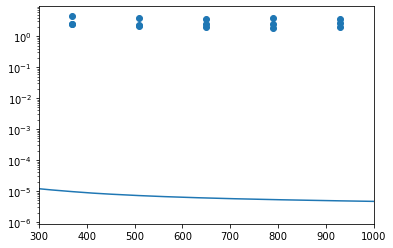

In [52]:
plt.plot(Cl_gI_1h + Cl_gI_2h, label='total', ls='-')
plt.scatter(l,cggb/(binned_cross + binned_cross2))
plt.yscale('log')
plt.xlim([300,1000])

TypeError: object of type 'numpy.int64' has no len()

In [60]:
print(hcos.cib_params)

{'alpha': 0.2, 'beta': 1.6, 'gamma': 1.7, 'delta': 2.4, 'Td_o': 20.7, 'logM_eff': 12.3, 'var': 0.3, 'L_o': 2e-07}


In [61]:
data = pd.read_csv('crosses.csv')
data = pd.DataFrame(data)
data

lb = data['l']
clb = data['cl']
cbr = data['err']
z  = data['z']

lb45 = lb[z == '.4-.5']
cl45 = clb[z == '.4-.5']
cbr45 = cbr[z == '.4-.5']
lb56 =lb[z == '.5-.6']
cl56 = clb[z == '.5-.6']
cbr56 = cbr[z == '.5-.6']
lb68 = lb[z == '.6-.8']
cl68 = clb[z == '.6-.8']
cbr68 = cbr[z == '.6-.8']

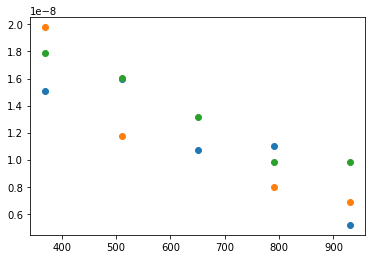

In [62]:
plt.scatter(lb45,cl45)
plt.scatter(lb56,cl56)
plt.scatter(lb68,cl68)

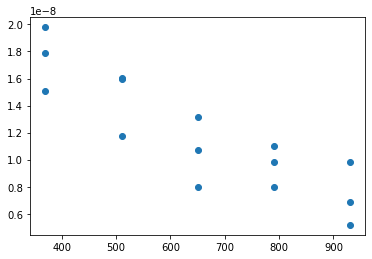

In [63]:
plt.scatter(lb,clb)

for i, alpha in enumerate(np.linspace(.1,.6,5)):
    hcos.cib_params['alpha'] = alpha
    
    # Power spectra for CIB x galaxies
    PgI_1h = hcos.get_power_1halo('CMASS', 'cib', nu_obs=np.array([cib_freq]))
    PgI_2h = hcos.get_power_2halo('CMASS', 'cib', nu_obs=np.array([cib_freq]))
    
    Cl_gI_1h = hcos.C_gI(ells, hcos.zs, hcos.ks, PgI_1h, gzs = zs, gdndz= np.ones_like(zs))
    Cl_gI_2h = hcos.C_gI(ells, hcos.zs, hcos.ks, PgI_2h, gzs = zs, gdndz= np.ones_like(zs))


Text(0.5, 1.0, 'Changing alpha')

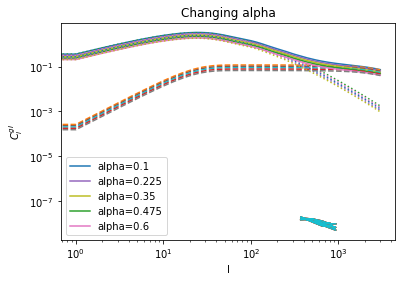

In [64]:
for i, alpha in enumerate(np.linspace(0.1,0.6, 5)):
    hcos.cib_params['alpha'] = alpha
    # Power spectra for CIB x galaxies
    PgI_1h = hcos.get_power_1halo('CMASS', 'cib', nu_obs=np.array([cib_freq]))
    PgI_2h = hcos.get_power_2halo('CMASS', 'cib', nu_obs=np.array([cib_freq]))

    Cl_gI_1h = hcos.C_gI(ells, hcos.zs, hcos.ks, PgI_1h, gzs = zs, gdndz= np.ones_like(zs))
    Cl_gI_2h = hcos.C_gI(ells, hcos.zs, hcos.ks, PgI_2h, gzs = zs, gdndz= np.ones_like(zs))

    plt.loglog(Cl_gI_1h + Cl_gI_2h, label='alpha={}'.format(alpha), ls='-')
    plt.loglog(Cl_gI_1h, ls='--')
    plt.loglog(Cl_gI_2h, ls=':')
    plt.loglog(lb,clb)

plt.xlabel(r'l')
plt.ylabel(r'$C^{gI}_l$')
plt.legend()
plt.title(r'Changing alpha')

# plot the actual data points that are binned
# bin this as well

In [43]:
# for 1 halo first
Cl_cross = Cl_gI_1h

Nbins = 16
lmin = 300
lmax = 1000

bins = np.round(np.linspace(lmin, lmax, Nbins+1))   # Bin edges
bins = bins.astype(int)
lcenterbin = np.zeros(len(bins)-1)
binned_cross = np.zeros(len(bins)-1)
binned_CIB = np.zeros(len(bins)-1)
binned_CMASS = np.zeros(len(bins)-1)

for k in range(0, len(bins)-1):  
    lmaxvec = np.arange(bins[k], bins[k+1], 1)
    lcenterbin[k] = np.round(0.5 * (bins[k] + bins[k+1]))   # bin center
    for l in lmaxvec:
        binned_cross[k] += Cl_cross[l]
    binned_cross[k] = binned_cross[k] / len(lmaxvec)


In [44]:
fsky = 0.24956215243688107

sigmavecth = np.zeros(len(bins)-1)
for k in range(0, len(bins)-1):
    lmaxvec = np.arange(bins[k], bins[k+1], 1)
    for l in lmaxvec:
        sigmavecth[k] += fsky * (2. * l + 1.) / (Cl_cross[l]**2)
    sigmavecth[k] = 1. / sigmavecth[k]
sigmavecth = np.sqrt(sigmavecth)


In [47]:
# for halo 2
Cl_cross2 = Cl_gI_2h

Nbins = 16
lmin = 300
lmax = 1000

bins = np.round(np.linspace(lmin, lmax, Nbins+1))   # Bin edges
bins = bins.astype(int)
lcenterbin2 = np.zeros(len(bins)-1)
binned_cross2 = np.zeros(len(bins)-1)
binned_CIB2 = np.zeros(len(bins)-1)
binned_CMASS2 = np.zeros(len(bins)-1)

for k in range(0, len(bins)-1):  
    lmaxvec = np.arange(bins[k], bins[k+1], 1)
    lcenterbin2[k] = np.round(0.5 * (bins[k] + bins[k+1]))   # bin center
    for l in lmaxvec:
        binned_cross2[k] += Cl_cross2[l]
    binned_cross2[k] = binned_cross2[k] / len(lmaxvec)

sigmavecth2 = np.zeros(len(bins)-1)
for k in range(0, len(bins)-1):
    lmaxvec = np.arange(bins[k], bins[k+1], 1)
    for l in lmaxvec:
        sigmavecth[k] += fsky * (2. * l + 1.) / (Cl_cross2[l]**2)
    sigmavecth[k] = 1. / sigmavecth[k]
sigmavecth2 = np.sqrt(sigmavecth)


In [68]:
halo1 = pd.DataFrame({'l': lcenterbin, 'cl': binned_cross, 'err': lcenterbin * sigmavecth})
clh1 = halo1['cl']
clh1 = clh1 /fsky
halo2 = pd.DataFrame({'l': lcenterbin2, 'cl': binned_cross2, 'err': lcenterbin2 * sigmavecth2})
clh2 = halo2['cl']
clh2 = clh2 /fsky
binn = halo1['l']

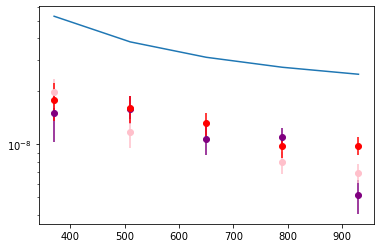

In [71]:
plt.errorbar(lb45,cl45, yerr= cbr45, fmt ='o', c = 'purple', label = 'z: .4-.5')
plt.errorbar(lb56,cl56, yerr = cbr56,fmt ='o', c = 'pink', label = 'z: .5-.6')
plt.errorbar(lb68,cl68, yerr = cbr68, fmt ='o', c = 'red', label = 'z: .6-.8')
plt.plot(lb68,((clh1 + clh2)*1e-6)/(4*np.pi), label = '1 halo + 2 halo')
plt.yscale('log')


# make it clear whats multiplied by the binning, or dont saved the scaled things
# make the mcmc, try and fit for the amplitude parametr in that 

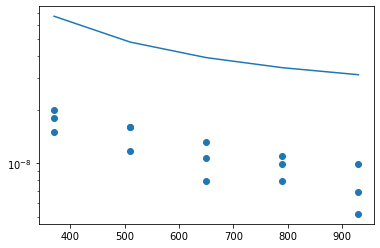

In [70]:
plt.scatter(lb,clb)
plt.plot(binn,((clh1 + clh2))*1e-7, label = '1 halo + 2 halo')
plt.yscale('log')

In [ ]:
# priors!

